# Information theory

## Self information

Information theory allows designing optimal codes and calculating the expected length of messages sampled from a probability distribution. This theory builds up by taking into several premises. Unlikely events are more informative than likely ones and independent events provide additive information. Self information is defined as 

$$
I(x)=-\log P(x). 
$$

Information can be then quantified, where $1$ *nat* is the information gained by observing an event of probability $1/e$, as $-\log_e (1/e)=1$. For the base-$2$ logarithm, $1$ *bit* is the information gained by observing an event with probability $1/2$, as $-\log_{e}1/e=1$. The logarithm ensures that observing two independent events, $A$ and $B$, provide additive information, as $p(A,B)=p(A)p(B)$, and so $I(A, B)=I(A)+I(B)$. Next figure shows that the higher the probability the lower the information.


In [1]:
# Import some dependencies. 
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'I(P(x))')

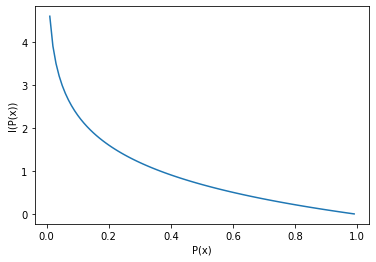

In [43]:
# Self information I(p)
p=np.arange(0.01,1,0.01)
plt.plot(p, -np.log(p))
plt.xlabel('P(x)')
plt.ylabel('I(P(x))')

## Shannon-entropy

The Shannon entropy gives an idea of the amount of uncertainty in the entire probability distribution. It is the expected amount of information in an event drawn from a distribution

$$
H(x)=E_{x\sim p}[I(x)]=E_{x\sim p}[-\log p(x)]=\int p(x)I(x)dx=-\int p(x)\log p(x)dx.
$$

It can provide a lower bound on the number of bits needed to encode a symbol. Uniform distributions have high entropy, where $H=\sum_i p_i\log p_i$. For instance, for a perfect dice, $p_i=p$ so $H=-\sum_i p_i\log p_i=-N(1/N)\log 1/N= \log N=1.79$; for a dice with $p(6)=0.5$ and $p(x\neq 6)=0.1$, $H=1.5$; for a dice biased to one number, $p(x_0)=1$, $p(x\neq x_0)=0$, $H=p_0\log p_0=0$, as almost deterministic distributions have low entropy. 

In [44]:
# Perfect dice
p=1/6; H_p=-6*p*np.log(p); 

# Dice biased to one number
p=(0.1,0.1,0.1,0.1,0.1,0.5); 
H_np=-sum([p[i]*np.log(p[i]) for i in range(6)])
print('Entropy for a perfect dice (H_p=%.2f) is higher than for a non-perfect dice with p(6)=0.3 (H_np=%.2f)' % (H_p, H_np))

Entropy for a perfect dice (H_p=1.79) is higher than for a non-perfect dice with p(6)=0.3 (H_np=1.50)


## Kullback-Leibler (KL) divergence

The KL divergence is used to measure the distance between two distribution. It quantifies the extra information needed to send a message containing symbols drawn from the distribution $P$ using a code that has been designed for the distribution $Q$,

$$
D_{KL}(P||Q)=E_{x\sim P}\left[\log\frac{P(x)}{Q(x)}\right]=\int p(x)[\log p(x)-\log q(x)]dx.
$$

$D_{KL}(P||Q)\geq 0$, and $D_{KL}(P||Q)=0$ when $P=Q$, but it is not a true distance as $D_{KL}(P||Q)\neq D_{KL}(Q||P)$.

## Cross-entropy

The cross-entropy measures the expected amount of information needed to encode a message containing symbols drawn from the distribution $P$ using a code that has been designed for the distribution $Q$

$$
H(P,Q)=-E_{x\sim P}[\log Q(x)]=-\int p(x)\log q(x)dx.
$$

From the definition of KL divergence, we see that

$$
H(P,Q)=H(P)+D_{KL}(P||Q)=-\int p(x)\log p(x)-\int p(x)\left[\log\frac{p(x)}{q(x)}\right].
$$

# Bayesian data analysis

## Bayes' rule

Bayesian inference aims to fit a probability model to a dat set, building a probability distribution on the model parametes and unobserved quantities. For this, Bayesian inference follows the following steps [A Gelman et al, Bayesian data analysis, Chapman&Hall/CRC, 2004]. First, we build the joint probability distribution for all quantities

$$
p(\theta,y)=p(\theta)p(y|\theta),
$$

where $p(\theta)$ is the prior distribution and $p(y|\theta)$ is the samplig or data distribution.

Second, conditioning on the observed data by calculating the posterior distribution, using Bayes' rule

$$
p(\theta|y)=\frac{p(\theta,y)}{p(y)}=\frac{p(\theta)p(y|\theta)}{p(y)},
$$

where $p(y)$ can be expressed as the sum over all possible values of $\theta$

$$
p(y)=\int p(\theta)p(y|\theta)d\theta
$$

Third, evaluating the model. 

For the case of three or more variables

$$
p(u,v,w)=\int p(u,v|w)p(w)=\int p(u|v,w)p(v|w)p(w).
$$

## Prediction

Let $y=(y_1,\ldots,y_n)$ be the observable data (a measurement repeated $n$ times), $\theta=(\mu,\sigma^2)$ its true value and variance, and $\tilde{y}$ a new unknown observable measurement. Predictive inference allows to make inference about this unknown observable quantity. We model the distribution of the observed variable or *marginal distribution* 

$$
p(y)=\int p(\theta,y)d\theta=\int p(\theta)p(y|\theta)d\theta,
$$

also called *prior predictive distribution*, prior as it is not conditional, and predictive as it is an observable. Once data is modelled, we can make inference about an unknown variable $\tilde{y}$ by calculating the *posterior predictive distribution*, posterior as it is conditional on the observed data and predictive as it is a prediction for an observable

$$
p(\tilde{y}|y)=\int p(\tilde{y},\theta|y)d\theta=\int p(\tilde{y}|\theta,y)p(\theta|y)d\theta=\int p(\tilde{y}|\theta)p(\theta|y)d\theta, 
$$

where in the last equation we use that $y$ and $\tilde{y}$ are conditionally independent given $\theta$.

## Expectation

The expected value of a random variable is given by

$$
E_x[x]=\int x p(x)dx
$$. 

The conditional expectation of a random variable is the expected value integrating over its conditional distribution

$$
E_x[x|y]=\int x p(x|y)dx. 
$$

Inserting the marginal distribution $p(x)=\int p(x,y)dy$ into the expected value
$$
E_x[x]=\int_x x p(x)dx=\int_x\int_y x p(x,y)dydx=\int_y\int_x x p(x|y)p(y)dxdy=\int_y E_x[x|y]p(y)dy=E_y[E_x[x|y]].
$$.


$$
E_{(x,y)}[f]=
$$

# Machine learning and statistical learning : Definitions

## Supervised, unsupervised and reinforcement learning

By *learning* we mean a computer program that learns from experience given a task and a performance metric and improves its performance with training. Machine learning and statistical learning share same methods, but while the former was developed in computer science, the latter was born in statistics with emphasis in statistical explanation (with an understanding of the inputs variables and statistical assessment of predictions). 

*Unsupervised learning* (UL) aims to learn properties and structure of data. In most cases, it can be understood as learning the probability distribution of data $p(X)$ by observing $X$, as in density estimation or denoising. Another case is clustering. There are not output variables or gold standard, only inputs, also called features or predictors. Data or space are grouped by similarity of features and can provide information about data structure or organization. 

*Supervised learning* (SL) can be seen as learning the posterior distribution $p(X|Y)$ by observing both input variables $X$ and target or output variable $Y$. This accounts for regression problems, which account for quantitative variables, and classification, where outputs constitute a finite qualitative set. Data need to be labelled, it requires input pairs $(x_i,y_i)$. UL is also useful for data processing before SL or for simplification, as labelling data is expensive. 

UL can be also seen as solving $n$ supervised problems
$$
p(X)=\Pi_i p(X_i|X_1,\ldots,X_{i-1}), 
$$
and a SL problem using UL to learn $p(X,Y)$
$$
p(X|Y)=\frac{p(X,Y)}{\sum_x p(X,Y)}.
$$

*Reinforcement learning* interact with the enviroment, so there is constant input an not a fixed data set.

## Statistical decision theory

Let $X$ be a vector on inputs, $Y$ the target variable, $f(X)$ the prediction model and $L(Y,f(X))$ the loss function for penalizing errors in the prediction. The *test error*, also named *generalization error*, is the *expected prediction error* (EPE) over the test set

$$
EPEErr=E[L(Y,f(X))]=\int L(Y,f(X))P(dx,dy),
$$

where $X$ and $Y$ are randomly sample from their joint distribution $P(X,Y)$. 
Training error is the average loss over the training set

$$
Err_{train}=\sum_{i=1}^N[L(y_i,f(x_i))]
$$

For regression problems, variables are quantitative and typical loss is the squared error

$$
L(X)=(Y-f(X))^2,
$$ 

or the absolute error, $L(X)=|Y-f(X)|$. 

For qualitative variables, the output variable or response $G$ takes values $1, 2, \ldots, K$. Typical loss is the $0$-$1$ loss, $L(G,\hat{G}(X))=I(G\neq\hat{G}(X))$, or the log-likelihood, also named *cross-entropy loss* or *deviance*

$$
L(G,\hat{G}(X))=-2\sum_{k=1}^KI(G=k)\log p_k(X)=-2\log p_G(X). 
$$

The EPE for squarred error loss

$$
EPE(f)=E_{(x,y)}[L(Y,f(X))]=\int L(y,f(x)) p(dx,dy)=\int_x\int_y L(y,f(x)) p(x,y)dxdy=\int_x\int_y L(y,f(x)) p(y|x)p(x)dxdy=E[L(y,f(x))]
$$